# **MÓDULO 34 - Regressão: Conceitos Avançados**

Para essa atividade vocês trabalharão com a mesma base que usamos na aula, para previsão do aluguel.

Durante a aula montamos um modelo de regressão polinomial utilizando a variavel Valor Condominio para prever a variavel valor aluguel. Nessa atividade vocês devem escolher outra váriavel dessa base para realizar a previsão do valor do aluguel.


# 1 - Realize a importação das bibliotecas necessárias, carrega a base de dados e separe em X e Y, selecionando uma das váriaveis para X não sendo a usada durante a aula.

In [162]:
#seu código aqui
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [164]:
df_Aluguel = pd.read_csv("Downloads/ALUGUEL_MOD12.csv", delimiter=';')

In [166]:
df_Aluguel

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
...,...,...,...,...,...,...,...
7198,25000,7500,627,4,5,4,6
7199,25000,4600,364,4,2,1,0
7200,25000,3700,266,3,4,3,7
7201,25000,6000,600,4,5,4,8


In [168]:
y = df_Aluguel['Valor_Aluguel']

In [220]:
X = df_Aluguel['N_Quartos']

# 2 - Faça o procecssamento dos dados utilizando o Polynomial Feature, com degree = 2.

In [216]:
#seu código aqui
poly_features = PolynomialFeatures(degree=2)

In [218]:
x_poly = poly_features.fit_transform(pd.DataFrame(X))

### Essa Linha a cima está covertendo a series X em um DataFreme e , em seguida,passando para a função fit_transform 

# 3 - Separe os dados em treino e teste e realize o treinamento do modelo.

In [202]:
#seu código aqui
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

# 4 - Faça as previsões para a base de teste e avalie os resultados obtidos, não se esqueça de plotar o gráfico da regressão.

In [206]:
#seu código aqui
Modelo = LinearRegression()
Modelo.fit(x_train, y_train)

LinearRegression()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


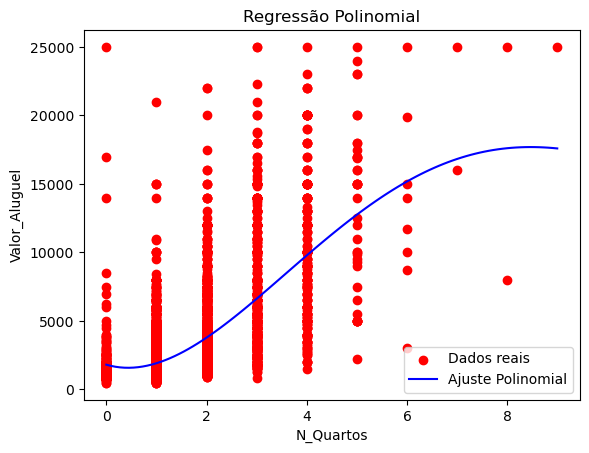

In [273]:
y_pred = Modelo.predict(x_test)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = Modelo.predict(x_range_poly)

plt.scatter(X, y, color='red', label='Dados reais')
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')
plt.xlabel('N_Quartos')
plt.ylabel('Valor_Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

In [288]:
r2 = r2_score(y_test, y_pred)
print(f'R² da Regressão Polinomial: {r2:.2f}')

R² da Regressão Polinomial: 0.50


# 5 - Refaça os passos anteriores, rodando um novo modelo, porém testando agora na fase de processamento o degree = 4. Avalie se o resultado desse novo modelo está superior ao anterior.

In [236]:
#seu código aqui
poly_features = PolynomialFeatures(degree=4)

In [238]:
x_poly = poly_features.fit_transform(pd.DataFrame(X))

In [242]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=0)

In [244]:
Modelo = LinearRegression()
Modelo.fit(x_train, y_train)

LinearRegression()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


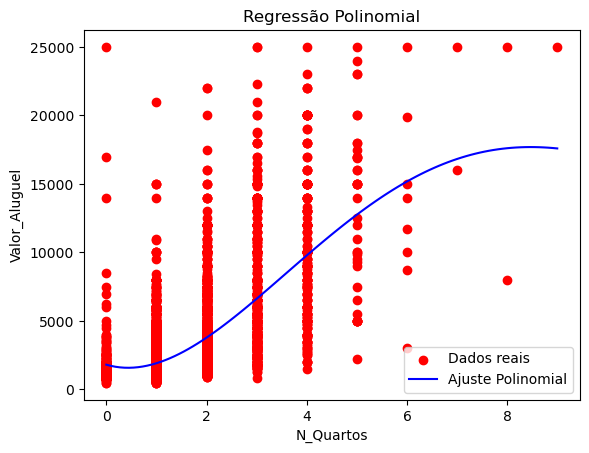

In [246]:
y_pred = Modelo.predict(x_test)

x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly_features.transform(x_range)
y_range_pred = Modelo.predict(x_range_poly)

plt.scatter(X, y, color='red', label='Dados reais')
plt.plot(x_range, y_range_pred, color='blue', label='Ajuste Polinomial')
plt.xlabel('N_Quartos')
plt.ylabel('Valor_Aluguel')
plt.title('Regressão Polinomial')
plt.legend()
plt.show()

In [290]:
r2 = r2_score(y_test, y_pred)
print(f'R² da Regressão Polinomial: {r2:.4f}')

R² da Regressão Polinomial: 0.4998


### Ao analisar os resultados, observamos que a Regressão Polinomial com grau 2 apresentou um desempenho ligeiramente melhor, alcançando um coeficiente de determinação (R²) de 0,50. Já a Regressão Polinomial com grau 4 obteve um R² de 0,4998, que é muito próximo ao resultado anterior. Embora a diferença seja pequena, esses resultados sugerem que o grau 2 pode ser uma escolha mais adequada para modelar a relação entre as variáveis nesse caso específico

# 6 - Explique com suas palavras o conceito e a diferença entre Elastic Net, Ridge e Lasso.
Minimo: 4 linhas.

* A Regressão Ridge adiciona uma penalidade á funçãde perda do modelo, proporcional ao quadrado do valor dos coeficientes.

* O Lasso também adiciona uma penalidade á função de perda do modelo, mas proporcional ao valor absoluto dos coeficientes

* O Elastic Net é uma combinação do Ridge e do Lasso. Ele adiciona uma penalidade á função de perda do modelo que é uma combinação do quadrado e do valor absoluto dos coeficientes.
